<a href="https://colab.research.google.com/github/Elman295/Deep-Learning-Course-INFO/blob/main/CI_MLP_Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`MNIST classification with MLP`

In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import DataLoader

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_ds = datasets.MNIST(

     root = "data",
     train = True,
     download = True,
     transform = transforms.ToTensor()
)

test_ds = datasets.MNIST(

     root = "data",
     download = True,
     train = False,
     transform = transforms.ToTensor()
)


100%|██████████| 9912422/9912422 [00:00<00:00, 149784599.36it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62057220.20it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46207290.63it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11854716.10it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
image, label = train_ds[0]

print(image.shape)

torch.Size([1, 28, 28])


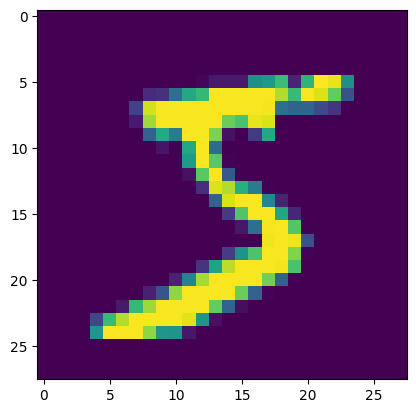

In [ ]:
plt.imshow(image.reshape(28,28))
plt.show()

In [3]:
train_dl = DataLoader(train_ds, batch_size = 256, shuffle = True)

test_dl = DataLoader(test_ds, batch_size = 256, shuffle = False)

In [ ]:
train_dl.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

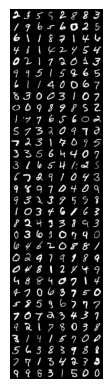

In [ ]:
images, labels = next(iter(train_dl))

outs = torchvision.utils.make_grid(images)

plt.imshow(np.transpose(outs, (1,2,0)))
plt.axis("off")
plt.show()

In [ ]:
class MLP(nn.Module):

  def __init__(self, output_node):
    super(MLP, self).__init__()

    self.linear_1 = nn.Linear(1*28*28, 512)
    self.linear_2 = nn.Linear(512, output_node)


  def forward(self, x):
    x = x.view((-1,1*28*28))
    x = F.relu(self.linear_1(x))
    x = self.linear_2(x)
    return x

In [ ]:
mlp = MLP(10)

In [ ]:
summary(mlp, input_size=(1,28,28), batch_size=256)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [256, 512]         401,920
            Linear-2                  [256, 10]           5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.77
Forward/backward pass size (MB): 1.02
Params size (MB): 1.55
Estimated Total Size (MB): 3.34
----------------------------------------------------------------


In [ ]:
def train(Data, Model, Loss_fn, Optimizer):

  size = len(Data.dataset)

  Model.train()

  for batch, (x,y) in enumerate(Data):
    y_pred = Model(x)
    loss = Loss_fn(y_pred, y)
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()

    if size % 100 ==0 :
      loss, current = loss.item(), batch * len(x)
      print(f"Loss: {loss} [{current} / {size}]")

In [ ]:
def test(Data, Model, Loss_fn):

  size = len(Data.dataset)
  num_batch = len(Data)
  correct, test_loss = 0,0
  Model.eval()

  with torch.no_grad():
    for x,y in Data:
      y_pred = Model(x)
      test_loss += Loss_fn(y_pred, y).item()
      correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batch
    correct /= size
    print(f"Test Loss: {test_loss} Accuracy:{correct * 100}")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params = mlp.parameters(), lr = 1e-3)

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
  print(f"epoch:{epoch+1}=-=-=-=-=-=--=-==--=-=-=")
  train(train_dl, mlp,loss_fn, opt)
  test(test_dl, mlp, loss_fn)

epoch:1=-=-=-=-=-=--=-==--=-=-=
Loss: 2.3129875659942627 [0 / 60000]
Loss: 2.303269624710083 [256 / 60000]
Loss: 2.3018877506256104 [512 / 60000]
Loss: 2.310478448867798 [768 / 60000]
Loss: 2.303879499435425 [1024 / 60000]
Loss: 2.3041343688964844 [1280 / 60000]
Loss: 2.3070945739746094 [1536 / 60000]
Loss: 2.3076682090759277 [1792 / 60000]
Loss: 2.304940938949585 [2048 / 60000]
Loss: 2.3043646812438965 [2304 / 60000]
Loss: 2.2926948070526123 [2560 / 60000]
Loss: 2.3093550205230713 [2816 / 60000]
Loss: 2.307098150253296 [3072 / 60000]
Loss: 2.299382448196411 [3328 / 60000]
Loss: 2.305635690689087 [3584 / 60000]
Loss: 2.305169105529785 [3840 / 60000]
Loss: 2.2978084087371826 [4096 / 60000]
Loss: 2.3029468059539795 [4352 / 60000]
Loss: 2.299638509750366 [4608 / 60000]
Loss: 2.3138034343719482 [4864 / 60000]
Loss: 2.307345390319824 [5120 / 60000]
Loss: 2.301560878753662 [5376 / 60000]
Loss: 2.306701421737671 [5632 / 60000]
Loss: 2.2958359718322754 [5888 / 60000]
Loss: 2.3016998767852783 [

#`Autoencoder`

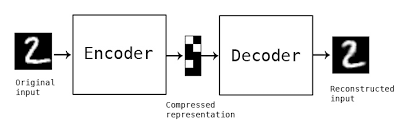

In [16]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):


      x = x.view((-1,28*28))
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      decoded = decoded.view((-1,1,28,28))
      return decoded

In [17]:

auto = AE()

In [18]:
loss_fn = nn.MSELoss()

In [19]:
opt = torch.optim.Adam(params = auto.parameters(),lr = 1e-3)


In [20]:
def train(Data, Model, Loss_fn, Optimizer):

  size = len(Data.dataset)

  Model.train()

  for batch, (x,y) in enumerate(Data):
    print(x.shape)

    y_pred = Model(x)
    print(y_pred.shape)
    loss = Loss_fn(y_pred, x)
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()

    if size % 100 ==0 :
      loss, current = loss.item(), batch * len(x)
      print(f"Loss: {loss} [{current} / {size}]")

In [21]:
for epoch in range(25):
  print(f"epoch: {epoch+1}=-=-=-=-=-=--=")
  train(train_dl, auto, loss_fn, opt)

Streaming output truncated to the last 5000 lines.
Loss: 0.025700783357024193 [55040 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02381570264697075 [55296 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.026922255754470825 [55552 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02409624494612217 [55808 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02751312032341957 [56064 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02539006806910038 [56320 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.0267231073230505 [56576 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02395472303032875 [56832 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.02337847463786602 [57088 / 60000]
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
Loss: 0.0250261090695858 [57344 / 60000]
torch.S

In [26]:
image, label = train_ds[1]

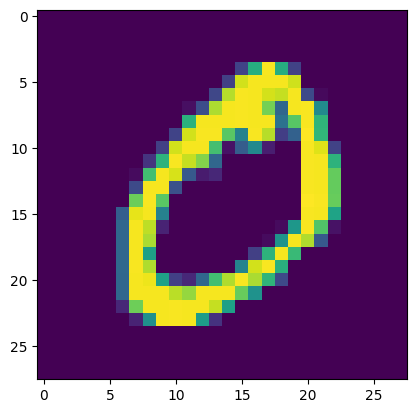

In [27]:
plt.imshow(image.reshape(28,28))
plt.show()

In [28]:
sample = auto(image)

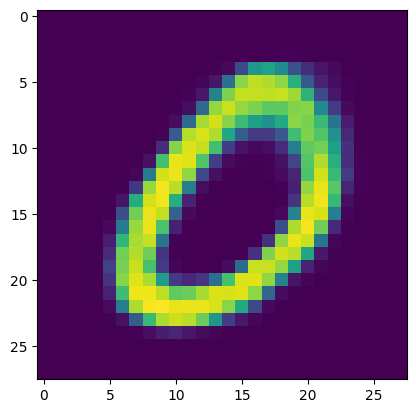

In [29]:
plt.imshow(sample.reshape(28,28).detach().numpy())
plt.show()